In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv(r"heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### Data Information

- Age : Age of the patient

- Sex : Sex of the patient

- exang: exercise induced angina (1 = yes; 0 = no)

- ca: number of major vessels (0-3)
- cp : Chest Pain type chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
    - trtbps : resting blood pressure (in mm Hg)
    - chol : cholestoral in mg/dl fetched via BMI sensor

- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

- rest_ecg : resting electrocardiographic results

    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    - thalach : maximum heart rate achieved

- target : 0= less chance of heart attack 1= more chance of heart attac

[Data Source：Kaggle](https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset)

In [4]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trtbps      303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalachh    303 non-null int64
exng        303 non-null int64
oldpeak     303 non-null float64
slp         303 non-null int64
caa         303 non-null int64
thall       303 non-null int64
output      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [6]:
df_Confirmed = df[df["output"]==1]
df_NotConfirmed=df[df["output"]==0]
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

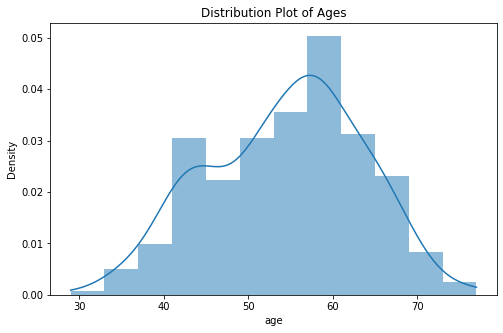

In [7]:
plt.figure(figsize = (8, 5))
sns.histplot(df['age'],kde=True, stat="density", linewidth=0)
plt.title('Distribution Plot of Ages')
plt.show()

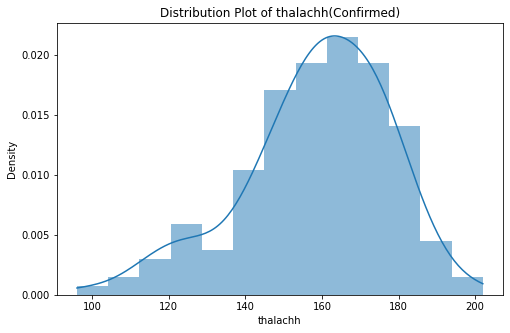

In [8]:
plt.figure(figsize = (8, 5))
sns.histplot(df_Confirmed['thalachh'], kde=True, stat="density", linewidth=0)
plt.title('Distribution Plot of thalachh(Confirmed)')
plt.show()

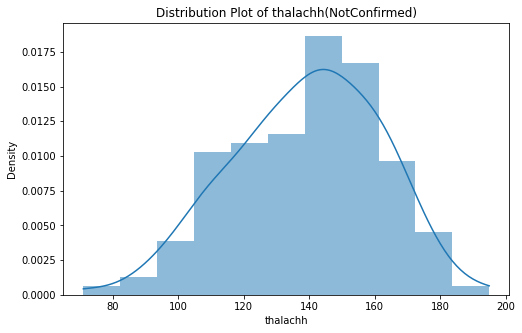

In [9]:
plt.figure(figsize = (8, 5))
sns.histplot(df_NotConfirmed['thalachh'], kde=True, stat="density", linewidth=0)
plt.title('Distribution Plot of thalachh(NotConfirmed)')
plt.show()

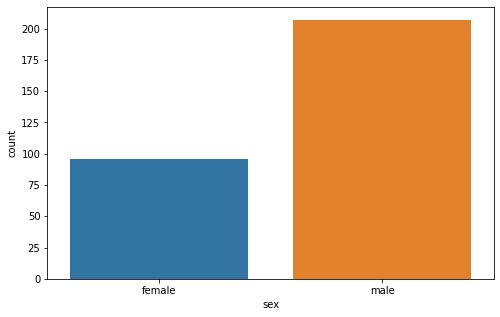

In [10]:
plt.figure(figsize = (8, 5))
sns.countplot(x="sex",data=df);
plt.xticks(ticks=[0,1],labels=["female","male"])
plt.show()

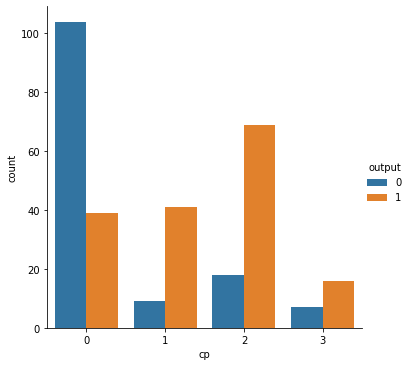

In [11]:
"""
0: typical angina 
1: atypical angina
2: non-anginal pain
3: asymptomatic

"""
sns.catplot(x="cp",
            hue="output", 
            kind="count", 
            data=df);

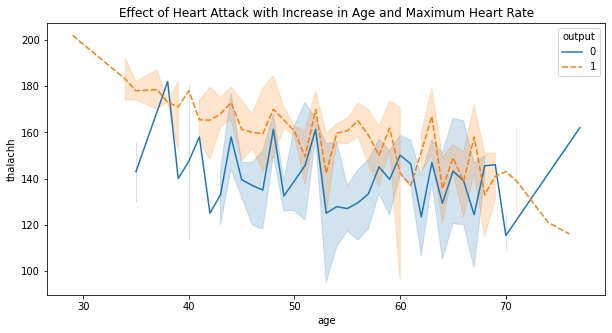

In [12]:
# 0:NotConfirmed, 1:Confirmed
plt.figure(figsize=(10,5))
sns.lineplot(x="age", y="thalachh", hue="output", style="output", data=df)
plt.title("Effect of Heart Attack with Increase in Age and Maximum Heart Rate")
plt.show()

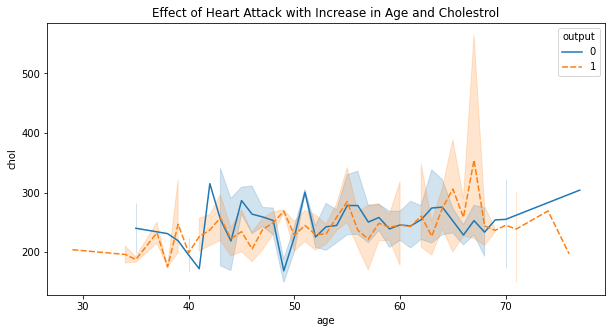

In [13]:
# 0:NotConfirmed, 1:Confirmed
plt.figure(figsize=(10,5))
sns.lineplot(x="age", y="chol", hue="output", style="output", data=df)
plt.title("Effect of Heart Attack with Increase in Age and Cholestrol")
plt.show()

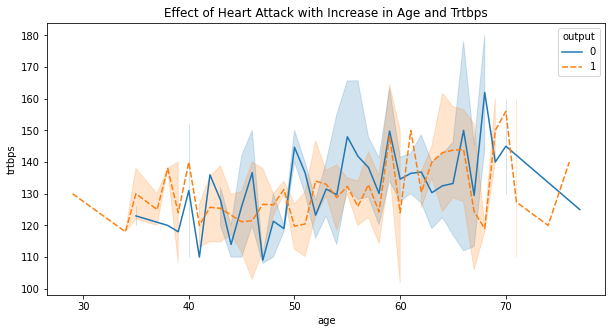

In [14]:
# 0:NotConfirmed, 1:Confirmed
plt.figure(figsize=(10,5))
sns.lineplot(x="age", y="trtbps", hue="output", style="output", data=df)
plt.title("Effect of Heart Attack with Increase in Age and Trtbps")
plt.show()

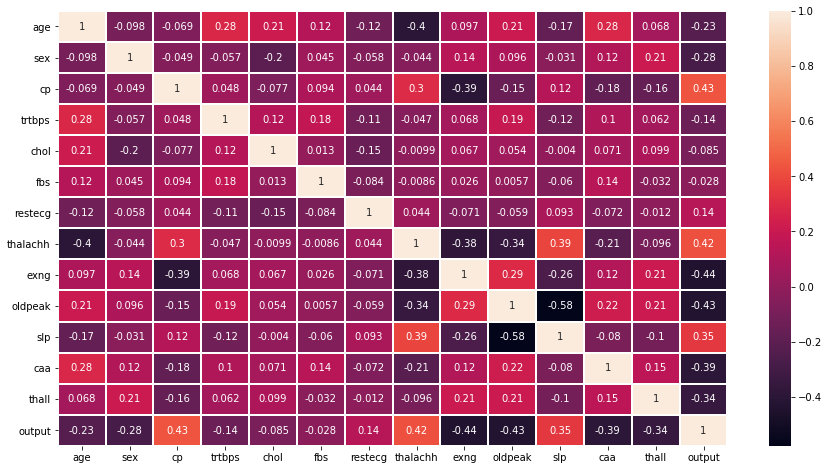

In [15]:
plt.figure(figsize = (15, 8))
sns.heatmap(df.corr(),data = df, annot = True, linewidths = 1)
plt.show()

## Model Building
<br>

In [16]:
X = df.drop("output", axis=1).values
Y = df['output'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=0)

In [17]:
#Confusion matrix
def Plot_confusion(y_true, y_pred):
    confmat = metrics.confusion_matrix(y_true=y_true, y_pred=y_pred)
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i,j], va='center', ha='center')
    plt.xlabel('predicted label')        
    plt.ylabel('true label')
    plt.show()

#### Decision tree

Test Accuracy 0.8032786885245902
Test Recall 0.8235294117647058
F1 Score: 0.8235294117647058
Roc Score: 0.8006535947712419


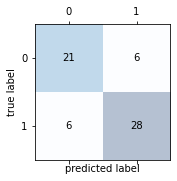

In [18]:
dtc= DecisionTreeClassifier(max_depth=4, random_state=1)
dtc.fit(X_train,Y_train)
dtc_pred=dtc.predict(X_test)

print("Test Accuracy", metrics.accuracy_score(Y_test, dtc_pred))
print("Test Recall", metrics.recall_score(Y_test, dtc_pred))
print("F1 Score:",metrics.f1_score(Y_test, dtc_pred))
print("Roc Score:",metrics.roc_auc_score(Y_test, dtc_pred))


#Test Data
Plot_confusion(Y_test, dtc_pred)

#### RandomForest

Test Accuracy 0.8524590163934426
Test Recall 0.8823529411764706
F1 Score: 0.8695652173913043
Roc Score: 0.8485838779956427


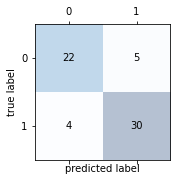

In [19]:
rfc = RandomForestClassifier(
    n_estimators=300)

rfc.fit(X_train,Y_train)
rfc_pred = rfc.predict(X_test)

print("Test Accuracy", metrics.accuracy_score(Y_test, rfc_pred))
print("Test Recall", metrics.recall_score(Y_test, rfc_pred))
print("F1 Score:",metrics.f1_score(Y_test, rfc_pred))
print("Roc Score:",metrics.roc_auc_score(Y_test, rfc_pred))

#Test Data
Plot_confusion(Y_test, rfc_pred)

#### XGBoost

Accuracy: 0.8360655737704918
Recall: 0.8823529411764706
F1 Score: 0.8571428571428571
Roc Score: 0.8300653594771241


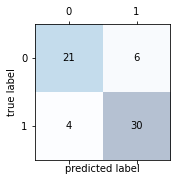

In [20]:
xgbc = XGBClassifier(
    learning_rate=0.09,
    max_depth=9, 
    colsample_bytree=0.9,
    objective='binary:logistic',
    eval_metric='error',
    use_label_encoder =False)

xgbc.fit(X_train, Y_train)
xgbc_pred = xgbc.predict(X_test)


print("Accuracy:", metrics.accuracy_score(Y_test, xgbc_pred))
print("Recall:", metrics.recall_score(Y_test, xgbc_pred))
print("F1 Score:",metrics.f1_score(Y_test, xgbc_pred))
print("Roc Score:",metrics.roc_auc_score(Y_test, xgbc_pred))

#Test Data
Plot_confusion(Y_test, xgbc_pred)